In [1]:
import numpy as np
import statistics as st
import pandas as pd 
import statsmodels.api as sm
from scipy import stats

In [15]:
#Giả thuyết 1: Lợi nhuận của các ngân hàng lớn có ảnh hưởng tích cực đến tăng trưởng GDP của Việt Nam.

import pandas as pd
import statsmodels.api as sm

# Load data for banks and GDP
df_TCB = pd.read_csv('financial_data_TCB_filtered.csv', encoding='ISO-8859-1')
df_VCB = pd.read_csv('financial_data_VCB_filtered.csv', encoding='ISO-8859-1')
df_MBB = pd.read_csv('financial_data_MBB_filtered.csv', encoding='ISO-8859-1')
df_BID = pd.read_csv('financial_data_BID_filtered.csv', encoding='ISO-8859-1')
df_GDP = pd.read_csv('gdp_quarterly_2013_2023.csv', encoding='ISO-8859-1')

# Define selected features with high relevance to Total Assets
selected_features = [
    'year' ,'roe', 'roa', 'interestMargin', 'badDebtPercentage', 'creditGrowth', 
    'operationProfit', 'yearOperationProfitGrowth', 'postTaxProfit', 'provisionOnBadDebt', 
    'equityOnTotalAsset'
]

# Helper function to filter and rename columns for each bank
def filter_and_rename(data, bank_name):
    available_features = [col for col in selected_features if col in data.columns]
    filtered_data = data[available_features].copy()
    filtered_data.columns = [f"{bank_name}_{col}" if col != 'year' else col for col in filtered_data.columns]
    return filtered_data

# Apply the filter function to each bank's dataset
vcb_filtered = filter_and_rename(df_VCB, 'VCB')
tcb_filtered = filter_and_rename(df_TCB, 'TCB')
mbb_filtered = filter_and_rename(df_MBB, 'MBB')
bid_filtered = filter_and_rename(df_BID, 'BID')

# Prepare GDP data by extracting the year from the Date column
df_GDP['year'] = pd.to_datetime(df_GDP['Date']).dt.year
gdp_q4 = df_GDP[(df_GDP['year'] >= 2013) & (df_GDP['year'] <= 2023)]

# Merge the bank data with GDP data on 'year'
merged_data = gdp_q4[['year', 'Quarterly_GDP']].merge(vcb_filtered, on='year') \
                                               .merge(tcb_filtered, on='year') \
                                               .merge(mbb_filtered, on='year') \
                                               .merge(bid_filtered, on='year')

# Define the independent variables (X) and dependent variable (y)
X = merged_data.drop(columns=['year', 'Quarterly_GDP'])  # Independent variables
y = merged_data['Quarterly_GDP']  # Dependent variable: Quarterly GDP growth

# Add a constant to the independent variables for the linear regression model
X = sm.add_constant(X)

# Fit the multivariate linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary to show coefficients and p-values
print(model.summary())

# Extract and print significant features based on p-value < 0.05
significant_features = model.pvalues[model.pvalues < 0.05].index.tolist()
print("Significant features with p-value < 0.05:", significant_features)


                            OLS Regression Results                            
Dep. Variable:          Quarterly_GDP   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     2038.
Date:                Tue, 12 Nov 2024   Prob (F-statistic):               0.00
Time:                        17:41:27   Log-Likelihood:            -1.4297e+05
No. Observations:               10752   AIC:                         2.860e+05
Df Residuals:                   10711   BIC:                         2.863e+05
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import statsmodels.api as sm
import numpy as np
# Load data for banks and GDP
df_TCB = pd.read_csv('financial_data_TCB_filtered.csv', encoding='ISO-8859-1')
df_VCB = pd.read_csv('financial_data_VCB_filtered.csv', encoding='ISO-8859-1')
df_MBB = pd.read_csv('financial_data_MBB_filtered.csv', encoding='ISO-8859-1')
df_BID = pd.read_csv('financial_data_BID_filtered.csv', encoding='ISO-8859-1')
df_GDP = pd.read_csv('gdp_quarterly_2013_2023.csv', encoding='ISO-8859-1')
# Selected features with potential impact on GDP
selected_features = [
    'year' ,'roe', 'roa', 'interestMargin', 'badDebtPercentage', 'creditGrowth', 
    'operationProfit', 'yearOperationProfitGrowth', 'postTaxProfit', 'provisionOnBadDebt', 
    'equityOnTotalAsset'
]
# Helper function to filter and rename columns for each bank
def filter_and_rename(data, bank_name):
    available_features = [col for col in selected_features if col in data.columns]
    filtered_data = data[available_features].copy()
    filtered_data.columns = [f"{bank_name}_{col}" if col != 'year' else col for col in filtered_data.columns]
    return filtered_data

# Apply the filter function to each bank's dataset
vcb_filtered = filter_and_rename(df_VCB, 'VCB')
tcb_filtered = filter_and_rename(df_TCB, 'TCB')
mbb_filtered = filter_and_rename(df_MBB, 'MBB')
bid_filtered = filter_and_rename(df_BID, 'BID')

# Prepare GDP data by extracting the year from the Date column
df_GDP['year'] = pd.to_datetime(df_GDP['Date']).dt.year
gdp_q4 = df_GDP[(df_GDP['year'] >= 2013) & (df_GDP['year'] <= 2023)]

# Merge the bank data with GDP data on 'year'
merged_data = gdp_q4[['year', 'Quarterly_GDP']].merge(vcb_filtered, on='year') \
                                               .merge(tcb_filtered, on='year') \
                                               .merge(mbb_filtered, on='year') \
                                               .merge(bid_filtered, on='year')

# Define X and y
X = merged_data.drop(columns=['year', 'Quarterly_GDP'])  # Independent variables
y = merged_data['Quarterly_GDP']  # Dependent variable: GDP growth

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model on the training set
model = sm.OLS(y_train, X_train).fit()

# Predict on the test set
y_pred_test = model.predict(X_test)

# Calculate RMSE on the test set
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("RMSE on test set:", rmse_test)

# Calculate MAPE on the test set
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
print("MAPE on test set:", mape_test)

RMSE on test set: 146665.0153257641
MAPE on test set: 0.06675728610589744


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000744 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1315
[LightGBM] [Info] Number of data points in the train set: 8601, number of used features: 40
[LightGBM] [Info] Start training from score 1855387.472837
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20


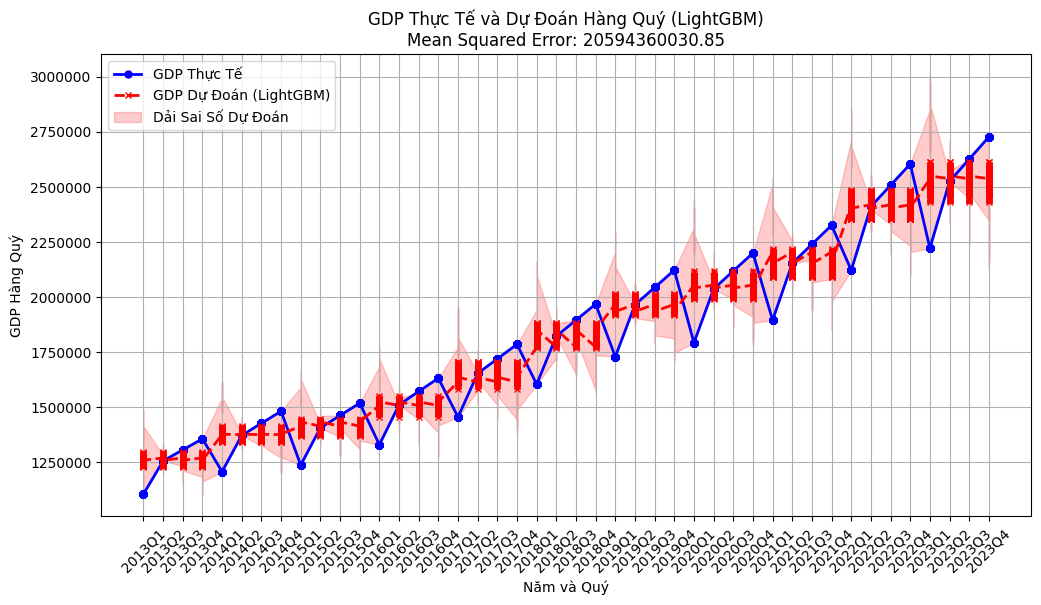

In [42]:

#biểu đồ này đang minh họa cho Giả thuyết 1:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt

# Đọc dữ liệu từ các file CSV
df_TCB = pd.read_csv('financial_data_TCB_filtered.csv', encoding='ISO-8859-1')
df_VCB = pd.read_csv('financial_data_VCB_filtered.csv', encoding='ISO-8859-1')
df_MBB = pd.read_csv('financial_data_MBB_filtered.csv', encoding='ISO-8859-1')
df_BID = pd.read_csv('financial_data_BID_filtered.csv', encoding='ISO-8859-1')
df_GDP = pd.read_csv('gdp_quarterly_2013_2023.csv', encoding='ISO-8859-1')

# Các đặc trưng được chọn có khả năng ảnh hưởng đến GDP
selected_features = [
    'year', 'roe', 'roa', 'interestMargin', 'badDebtPercentage', 'creditGrowth', 
    'operationProfit', 'yearOperationProfitGrowth', 'postTaxProfit', 'provisionOnBadDebt', 
    'equityOnTotalAsset'
]

# Hàm hỗ trợ lọc và đổi tên cột cho mỗi ngân hàng
def filter_and_rename(data, bank_name):
    available_features = [col for col in selected_features if col in data.columns]
    filtered_data = data[available_features].copy()
    filtered_data.columns = [f"{bank_name}_{col}" if col != 'year' else col for col in filtered_data.columns]
    return filtered_data

# Áp dụng hàm lọc cho dữ liệu của từng ngân hàng
vcb_filtered = filter_and_rename(df_VCB, 'VCB')
tcb_filtered = filter_and_rename(df_TCB, 'TCB')
mbb_filtered = filter_and_rename(df_MBB, 'MBB')
bid_filtered = filter_and_rename(df_BID, 'BID')

# Chuẩn bị dữ liệu GDP bằng cách trích xuất năm và quý từ cột Date
df_GDP['year'] = pd.to_datetime(df_GDP['Date']).dt.year
df_GDP['year_quarter'] = pd.to_datetime(df_GDP['Date']).dt.to_period('Q')
gdp_q4 = df_GDP[(df_GDP['year'] >= 2013) & (df_GDP['year'] <= 2023)]

# Gộp dữ liệu của ngân hàng với dữ liệu GDP theo 'year'
merged_data = gdp_q4[['year', 'year_quarter', 'Quarterly_GDP']].merge(vcb_filtered, on='year') \
                                               .merge(tcb_filtered, on='year') \
                                               .merge(mbb_filtered, on='year') \
                                               .merge(bid_filtered, on='year')

# Định nghĩa X và y
X = merged_data.drop(columns=['year', 'year_quarter', 'Quarterly_GDP'])  # Biến độc lập
y = merged_data['Quarterly_GDP']  # Biến phụ thuộc: Tăng trưởng GDP

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo mô hình LightGBM với các siêu tham số đã điều chỉnh
lgb_model = LGBMRegressor(random_state=42, n_estimators=500, learning_rate=0.05, max_depth=10, num_leaves=31, min_data_in_leaf=20, reg_alpha=0.1, reg_lambda=0.1)

# Huấn luyện mô hình trên tập huấn luyện
lgb_model.fit(X_train, y_train)

# Dự đoán trên toàn bộ tập dữ liệu
y_pred_all = lgb_model.predict(X)

# Tính toán các chỉ số lỗi
mse = mean_squared_error(y, y_pred_all)

# Tạo biểu đồ đường cho GDP thực tế và GDP dự đoán
plt.figure(figsize=(12, 6))

# Chuyển đổi 'year_quarter' sang chuỗi để vẽ biểu đồ
plt.plot(merged_data['year_quarter'].astype(str), y, label='GDP Thực Tế', color='blue', marker='o', markersize=5, linewidth=2)
plt.plot(merged_data['year_quarter'].astype(str), y_pred_all, label='GDP Dự Đoán (LightGBM)', color='red', linestyle='--', marker='x', markersize=5, linewidth=2)

# Thêm dải sai số
error = np.abs(y - y_pred_all)
plt.fill_between(merged_data['year_quarter'].astype(str), y_pred_all - error, y_pred_all + error, color='red', alpha=0.2, label='Dải Sai Số Dự Đoán')

# Cải thiện định dạng và khả năng đọc của biểu đồ
plt.xlabel('Năm và Quý')
plt.ylabel('GDP Hàng Quý')
plt.title(f'GDP Thực Tế và Dự Đoán Hàng Quý (LightGBM)\nMean Squared Error: {mse:.2f}')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.legend(loc='upper left')
plt.grid()
plt.show()
